In [14]:
import pandas as pd

# Process Data: (Process ID, Burst Time, Arrival Time)
processes = [("P1", 24, 0), ("P2", 3, 1), ("P3", 3, 2)]

In [15]:
# Create DataFrame
df = pd.DataFrame(processes, columns=["Process", "Burst Time", "Arrival Time"])

In [16]:
df

,Process,Burst Time,Arrival Time
0,P1,24,0
1,P2,3,1
2,P3,3,2


In [17]:
# Sort by Arrival Time (FCFS Rule)
df.sort_values(by="Arrival Time", inplace=True)

In [18]:
# Compute Completion Time (CT)
df["Completion Time"] = 0
start_time = 0
for i in range(len(df)):
    start_time = max(start_time, df.iloc[i]["Arrival Time"]) + df.iloc[i]["Burst Time"]
    df.at[i, "Completion Time"] = start_time

In [19]:
# Compute Turnaround Time (TAT = CT - AT)
df["Turnaround Time"] = df["Completion Time"] - df["Arrival Time"]

In [20]:
df

,Process,Burst Time,Arrival Time,Completion Time,Turnaround Time
0,P1,24,0,24,24
1,P2,3,1,27,26
2,P3,3,2,30,28


In [21]:
# Compute Waiting Time (WT = TAT - BT)
df["Waiting Time"] = df["Turnaround Time"] - df["Burst Time"]

df

,Process,Burst Time,Arrival Time,Completion Time,Turnaround Time,Waiting Time
0,P1,24,0,24,24,0
1,P2,3,1,27,26,23
2,P3,3,2,30,28,25


In [22]:
avg_tat = df["Turnaround Time"].mean()
avg_wt = df["Waiting Time"].mean()

In [23]:
print(f"\nAverage Turnaround Time: {avg_tat:.2f}")
print(f"Average Waiting Time: {avg_wt:.2f}")


Average Turnaround Time: 26.00
Average Waiting Time: 16.00


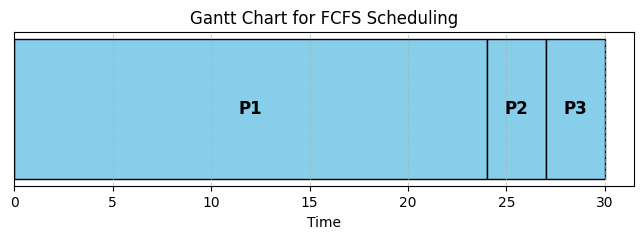

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 2))
start_time = 0

for _, row in df.iterrows():
    ax.barh(y=0, width=row["Burst Time"], left=start_time, color="skyblue", edgecolor="black")
    plt.text(start_time + row["Burst Time"] / 2, 0, row["Process"], ha="center", va="center", fontsize=12, fontweight="bold")
    start_time = row["Completion Time"]

ax.set_xlabel("Time")
ax.set_yticks([])
ax.set_title("Gantt Chart for FCFS Scheduling")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()